### Goal:
The goal of this problem is to predict the Price of an Old car based on the variables provided in the data set.

### Metric to measure
The measure of accuracy will be RMSE (root mean square error). The predicted Price for each car in the Test dataset will be compared with the actual Price to calculate the RMSE value of the entire prediction. The lower the RMSE value, the better the model will be.

### Submission File Format:
You are to submit a csv file with exactly 5615 entries plus a header row. The file should have exactly two columns
1.	ID (sorted in any order)
2.	Price

In [1094]:
# Load the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Train Dataset

In [1095]:
# Load the train Dataset
train= pd.read_csv('Training Data Set_N(1).csv')

In [1096]:
train.head()

,Id,Maker,model,Location,distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,None,None,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4,5,diesel,3085561.50


In [1097]:
# Shape
train.shape

(53515, 17)

In [1098]:
# No. of missing values columnwise
train.isnull().sum()

Id                         0
Maker                      0
model                      0
Location                   0
distance                1211
Owner Type                 0
manufacture_year           0
Age of car                 0
engine_displacement        0
engine_power            1439
body_type              49379
Vroom Audit Rating         0
transmission               0
door_count                 0
seat_count                 0
fuel_type                  0
Price                      0
dtype: int64

In [1099]:
# Total no. of missing values
train.isnull().sum().sum()

52029

In [1100]:
# Finding the datatype of each column
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 17 columns):
Id                     53515 non-null int64
Maker                  53515 non-null object
model                  53515 non-null object
Location               53515 non-null object
distance               52304 non-null float64
Owner Type             53515 non-null object
manufacture_year       53515 non-null int64
Age of car             53515 non-null int64
engine_displacement    53515 non-null int64
engine_power           52076 non-null float64
body_type              4136 non-null object
Vroom Audit Rating     53515 non-null int64
transmission           53515 non-null object
door_count             53515 non-null object
seat_count             53515 non-null object
fuel_type              53515 non-null object
Price                  53515 non-null float64
dtypes: float64(3), int64(5), object(9)
memory usage: 6.9+ MB


In [1101]:
train.corr()

,Id,distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Price
Id,1.000000,-0.000282,0.001935,-0.001935,0.003698,0.002456,0.005602,0.003195
distance,-0.000282,1.000000,-0.229124,0.229124,0.111261,0.012034,-0.006298,-0.158515
manufacture_year,0.001935,-0.229124,1.000000,-1.000000,-0.090401,0.051245,0.003985,0.506707
Age of car,-0.001935,0.229124,-1.000000,1.000000,0.090401,-0.051245,-0.003985,-0.506707
engine_displacement,0.003698,0.111261,-0.090401,0.090401,1.000000,0.387959,-0.005828,0.162072
engine_power,0.002456,0.012034,0.051245,-0.051245,0.387959,1.000000,-0.001790,0.627944
Vroom Audit Rating,0.005602,-0.006298,0.003985,-0.003985,-0.005828,-0.001790,1.000000,0.005109
Price,0.003195,-0.158515,0.506707,-0.506707,0.162072,0.627944,0.005109,1.000000


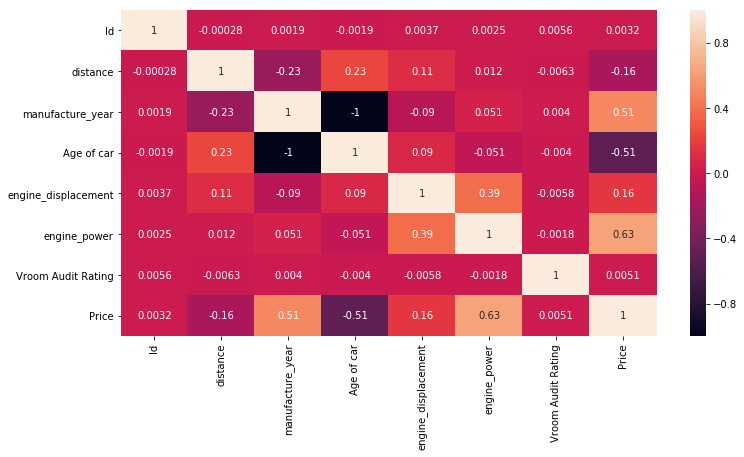

In [1102]:
plt.figure(figsize=[12,6])
sns.heatmap(train.corr(),annot=True)

In [1103]:
train.columns

Index(['Id', 'Maker', 'model', 'Location', 'distance', 'Owner Type',
       'manufacture_year', 'Age of car', 'engine_displacement', 'engine_power',
       'body_type', 'Vroom Audit Rating', 'transmission', 'door_count',
       'seat_count', 'fuel_type', 'Price'],
      dtype='object')

### Analysis of Column 'Maker'

In [1104]:
train['Maker'].isnull().sum()

0

In [1105]:
train['Maker'].value_counts()

skoda       21563
toyota       7840
audi         7326
bmw          7178
nissan       5485
hyundai      2240
fiat         1845
maserati       38
Name: Maker, dtype: int64

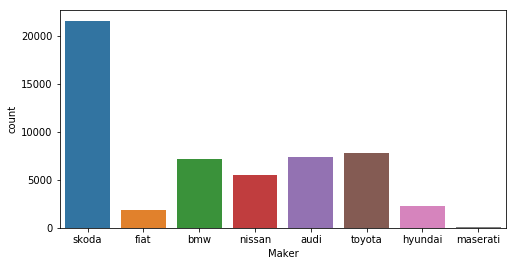

In [1106]:
plt.figure(figsize=[8,4])
sns.countplot(train['Maker'])

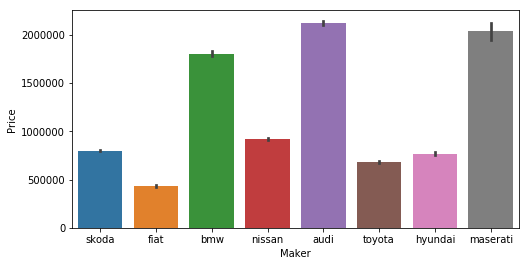

In [1107]:


plt.figure(figsize=[8,4])
sns.barplot(train['Maker'],train['Price'])

#### Observation- From bargraph and countplot, we can infer that high price cars have low no. of sales.

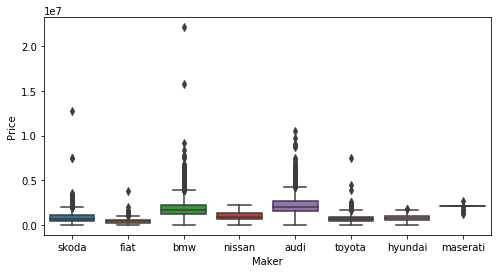

In [1108]:
plt.figure(figsize=[8,4])
sns.boxplot(train['Maker'],train['Price'])

#### Observation- From boxplot, we can infer that BMW have most high price cars.

In [1109]:
train['Maker'].nunique()

8

In [1110]:
train['Maker'].unique()

array(['skoda', 'fiat', 'bmw', 'nissan', 'audi', 'toyota', 'hyundai',
       'maserati'], dtype=object)

### Analysis of Column 'Body Type'

In [1111]:
train['body_type'].isnull().sum()

49379

In [1112]:
train['body_type'].value_counts()

compact    4127
van           9
Name: body_type, dtype: int64

In [1113]:
print(((4127/4136)*100),'% compact before filling')
print(((9/4136)*100),'% van before filling')

99.78239845261122 % compact before filling
0.21760154738878143 % van before filling


In [1114]:
train['body_type'].fillna(method='ffill', inplace=True)

In [1115]:
train['body_type'].value_counts()

compact    53438
van           77
Name: body_type, dtype: int64

In [1116]:
print(((53438/53515)*100),'% compact after filling')
print(((77/53515)*100),'% van after filling')

99.85611510791367 % compact after filling
0.14388489208633093 % van after filling


In [1117]:
train.isnull().sum()

Id                        0
Maker                     0
model                     0
Location                  0
distance               1211
Owner Type                0
manufacture_year          0
Age of car                0
engine_displacement       0
engine_power           1439
body_type                 0
Vroom Audit Rating        0
transmission              0
door_count                0
seat_count                0
fuel_type                 0
Price                     0
dtype: int64

In [1118]:
train.corr()

,Id,distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Price
Id,1.000000,-0.000282,0.001935,-0.001935,0.003698,0.002456,0.005602,0.003195
distance,-0.000282,1.000000,-0.229124,0.229124,0.111261,0.012034,-0.006298,-0.158515
manufacture_year,0.001935,-0.229124,1.000000,-1.000000,-0.090401,0.051245,0.003985,0.506707
Age of car,-0.001935,0.229124,-1.000000,1.000000,0.090401,-0.051245,-0.003985,-0.506707
engine_displacement,0.003698,0.111261,-0.090401,0.090401,1.000000,0.387959,-0.005828,0.162072
engine_power,0.002456,0.012034,0.051245,-0.051245,0.387959,1.000000,-0.001790,0.627944
Vroom Audit Rating,0.005602,-0.006298,0.003985,-0.003985,-0.005828,-0.001790,1.000000,0.005109
Price,0.003195,-0.158515,0.506707,-0.506707,0.162072,0.627944,0.005109,1.000000


In [1119]:
train[(train['engine_power'].isnull()) & (train['engine_displacement'].isnull())]

,Id,Maker,model,Location,distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price


In [1120]:
train.columns

Index(['Id', 'Maker', 'model', 'Location', 'distance', 'Owner Type',
       'manufacture_year', 'Age of car', 'engine_displacement', 'engine_power',
       'body_type', 'Vroom Audit Rating', 'transmission', 'door_count',
       'seat_count', 'fuel_type', 'Price'],
      dtype='object')

In [1121]:
train['engine_power'].describe()

count    52076.000000
mean       100.448345
std         45.330622
min         10.000000
25%         73.000000
50%         91.000000
75%        125.000000
max        896.000000
Name: engine_power, dtype: float64

In [1122]:
train['engine_power'].isnull().sum()

1439

In [1123]:
train['engine_power'].replace(np.nan, 91,inplace= True)

In [1124]:
train['engine_power'].isnull().sum()

0

In [1125]:
train.isnull().sum()

Id                        0
Maker                     0
model                     0
Location                  0
distance               1211
Owner Type                0
manufacture_year          0
Age of car                0
engine_displacement       0
engine_power              0
body_type                 0
Vroom Audit Rating        0
transmission              0
door_count                0
seat_count                0
fuel_type                 0
Price                     0
dtype: int64

In [1126]:
train['distance'].describe()

count    5.230400e+04
mean     9.454626e+04
std      2.755617e+05
min      0.000000e+00
25%      1.549000e+04
50%      6.552000e+04
75%      1.356410e+05
max      9.899800e+06
Name: distance, dtype: float64

In [1127]:
train.corr()

,Id,distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Price
Id,1.000000,-0.000282,0.001935,-0.001935,0.003698,0.002459,0.005602,0.003195
distance,-0.000282,1.000000,-0.229124,0.229124,0.111261,0.009335,-0.006298,-0.158515
manufacture_year,0.001935,-0.229124,1.000000,-1.000000,-0.090401,0.048981,0.003985,0.506707
Age of car,-0.001935,0.229124,-1.000000,1.000000,0.090401,-0.048981,-0.003985,-0.506707
engine_displacement,0.003698,0.111261,-0.090401,0.090401,1.000000,0.312616,-0.005828,0.162072
engine_power,0.002459,0.009335,0.048981,-0.048981,0.312616,1.000000,-0.001641,0.620668
Vroom Audit Rating,0.005602,-0.006298,0.003985,-0.003985,-0.005828,-0.001641,1.000000,0.005109
Price,0.003195,-0.158515,0.506707,-0.506707,0.162072,0.620668,0.005109,1.000000


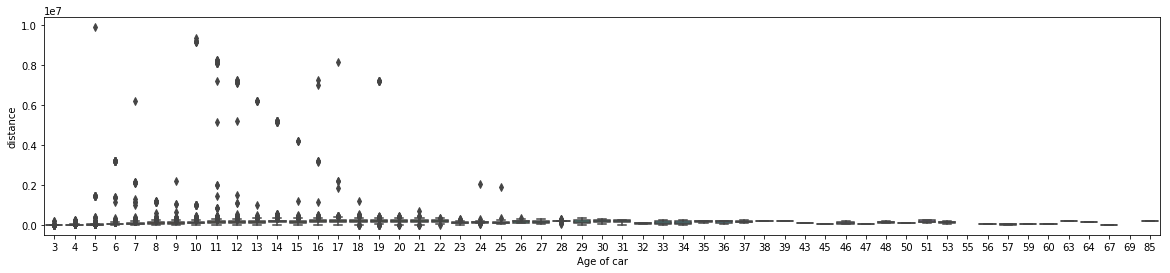

In [1128]:
plt.figure(figsize=[20,4])
sns.boxplot(train['Age of car'],train['distance'])

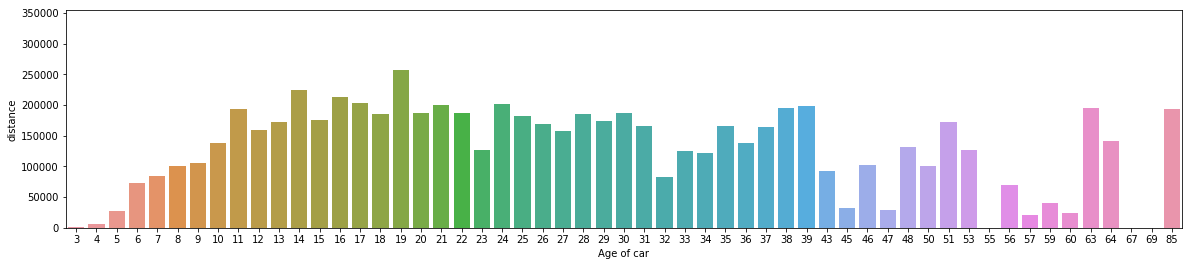

In [1129]:
plt.figure(figsize=[20,4])
sns.barplot(train['Age of car'],train['distance'], errwidth=0)

In [1130]:
train.groupby(['Age of car'])['distance'].describe()


,count,mean,std,min,25%,50%,75%,max
Age of car,,,,,,,,
3,205.0,2038.156098,19511.272998,0.0,10.00,10.0,10.00,198000.0
4,12355.0,6050.446945,11529.938064,0.0,10.00,100.0,9000.00,259000.0
5,4861.0,28112.982720,158053.032747,0.0,10963.00,19300.0,28100.00,9899800.0
6,2890.0,73606.910035,240668.114949,0.0,27430.50,43460.0,69300.00,3188255.0
7,6215.0,84629.641512,114801.852743,0.0,45300.00,70000.0,107000.00,6200000.0
8,4855.0,100266.687951,73820.420372,0.0,57688.00,88200.0,130881.50,1195500.0
9,3680.0,105997.157065,68502.147457,0.0,67000.00,91715.5,135000.00,2201077.0
10,2834.0,138009.888497,425760.960925,0.0,71188.50,104708.0,150000.00,9370350.0
11,2753.0,192997.567381,655619.182917,0.0,94800.00,128000.0,173900.00,8258200.0


In [1131]:
dist= train[train['distance'].isnull()]

In [1132]:
ind= train.groupby(['Age of car'])['distance'].describe()

In [1133]:
ind.index

Int64Index([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
            20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
            37, 38, 39, 43, 45, 46, 47, 48, 50, 51, 53, 55, 56, 57, 59, 60, 63,
            64, 67, 69, 85],
           dtype='int64', name='Age of car')

In [1134]:
train['distance'].describe()

count    5.230400e+04
mean     9.454626e+04
std      2.755617e+05
min      0.000000e+00
25%      1.549000e+04
50%      6.552000e+04
75%      1.356410e+05
max      9.899800e+06
Name: distance, dtype: float64

In [1135]:
#for i in dist.index:
#    train[i,'distance'] = train['distance'].replace(np.nan, train.groupby(['Age of car'])['distance'].median(),inplace=True)

In [1136]:
train['distance']= train.groupby('Age of car')['distance'].transform(lambda x:x.fillna(x.median()))

In [1137]:
train['distance'].isnull().sum()

8

In [1138]:
train[train['distance'].isnull()]

,Id,Maker,model,Location,distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,None,None,petrol,543764.25
2050,27051,skoda,octavia,Kolkata,NaN,First,1950,69,1900,81.0,compact,6,auto,None,None,petrol,330033.00
2407,27408,skoda,octavia,Mumbai,NaN,First,1950,69,1900,81.0,compact,4,auto,None,None,petrol,346965.00
7118,32119,skoda,octavia,Coimbatore,NaN,Third,1950,69,1900,81.0,compact,7,auto,None,None,petrol,324759.75
7422,32423,skoda,octavia,Pune,NaN,First,1950,69,1900,81.0,compact,6,auto,None,None,petrol,346965.00
12431,37432,skoda,octavia,Coimbatore,NaN,Second,1950,69,1900,81.0,compact,4,auto,None,None,petrol,346965.00
26506,51507,skoda,octavia,Delhi,NaN,Second,1964,55,1964,147.0,compact,6,man,None,None,petrol,499629.75
36712,61713,skoda,octavia,Mumbai,NaN,Second,1950,69,1900,81.0,compact,4,auto,None,None,petrol,330033.00


In [1139]:
train['distance'].replace(np.nan, train['distance'].median(), inplace=True)

### Analysis of 'Door_Count' Column

In [1140]:
train['door_count'].unique()

array(['None', '4', '5', '2', '3', '1', '6'], dtype=object)

In [1141]:
train['door_count'].value_counts()

4       33808
5        7630
None     7534
2        4348
3         185
6           8
1           2
Name: door_count, dtype: int64

In [1142]:
train.columns

Index(['Id', 'Maker', 'model', 'Location', 'distance', 'Owner Type',
       'manufacture_year', 'Age of car', 'engine_displacement', 'engine_power',
       'body_type', 'Vroom Audit Rating', 'transmission', 'door_count',
       'seat_count', 'fuel_type', 'Price'],
      dtype='object')

In [1143]:
pd.crosstab(index=train['seat_count'], columns= train['door_count'])

door_count,1,2,3,4,5,6,None
seat_count,,,,,,,
1,0,0,0,0,0,0,1
2,0,668,0,42,12,0,3
3,0,109,0,0,0,0,0
4,0,1895,102,2171,155,0,144
5,0,1405,60,28657,6887,5,1810
6,0,0,0,13,7,2,1
7,0,0,0,781,33,0,38
8,0,0,0,0,1,0,0
9,0,0,0,0,2,0,0


In [1144]:
train['door_count'].replace('None', method= 'ffill',inplace=True)

In [1145]:
train['door_count'].value_counts()

4       39380
5        8877
2        5029
3         217
6           9
1           2
None        1
Name: door_count, dtype: int64

In [1146]:
train['door_count'].head()

0    None
1       4
2       4
3       4
4       4
Name: door_count, dtype: object

In [1147]:
train['door_count'].replace('None', '4', inplace=True)

In [1148]:
train['door_count'].value_counts()

4    39381
5     8877
2     5029
3      217
6        9
1        2
Name: door_count, dtype: int64

In [1149]:
train['seat_count'].replace('None', method= 'ffill',inplace=True)

In [1150]:
train['seat_count'].value_counts()

5       46190
4        5291
7        1011
2         857
3         134
6          26
9           2
1           2
None        1
8           1
Name: seat_count, dtype: int64

In [1151]:
train['seat_count'].head()

0    None
1       4
2       5
3       5
4       5
Name: seat_count, dtype: object

In [1152]:
train['seat_count'].replace('None', '4', inplace=True)

In [1153]:
train['seat_count'].value_counts()

5    46190
4     5292
7     1011
2      857
3      134
6       26
9        2
1        2
8        1
Name: seat_count, dtype: int64

In [1154]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 17 columns):
Id                     53515 non-null int64
Maker                  53515 non-null object
model                  53515 non-null object
Location               53515 non-null object
distance               53515 non-null float64
Owner Type             53515 non-null object
manufacture_year       53515 non-null int64
Age of car             53515 non-null int64
engine_displacement    53515 non-null int64
engine_power           53515 non-null float64
body_type              53515 non-null object
Vroom Audit Rating     53515 non-null int64
transmission           53515 non-null object
door_count             53515 non-null object
seat_count             53515 non-null object
fuel_type              53515 non-null object
Price                  53515 non-null float64
dtypes: float64(3), int64(5), object(9)
memory usage: 6.9+ MB


## Test Dataset

In [1155]:
test= pd.read_csv('Test+Data+Set(1).csv')

In [1156]:
test.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,11001,skoda,octavia,Mumbai,150000.0,First,2007,12,1595,75.0,NaN,5,man,4,5,petrol
1,11002,skoda,rapid,Coimbatore,29376.0,Third,2014,5,1598,77.0,NaN,4,man,4,5,diesel
2,11003,skoda,octavia,Coimbatore,30563.0,Second,2014,5,1968,110.0,NaN,5,man,5,5,diesel
3,11004,audi,q3,Delhi,8650.0,Fourth & Above,2015,4,1968,110.0,NaN,8,auto,4,5,diesel
4,11005,audi,tt,Chennai,6400.0,Third,2015,4,1984,169.0,NaN,4,auto,2,None,petrol


In [1157]:
test.shape

(5615, 16)

In [1158]:
test.isnull().sum()

Id                        0
Maker                     0
model                     0
Location                  0
Distance                128
Owner Type                0
manufacture_year          0
Age of car                0
engine_displacement       0
engine_power            168
body_type              5193
Vroom Audit Rating        0
transmission              0
door_count                0
seat_count                0
fuel_type                 0
dtype: int64

In [1159]:
test.columns

Index(['Id', 'Maker', 'model', 'Location', 'Distance ', 'Owner Type',
       'manufacture_year', 'Age of car', 'engine_displacement', 'engine_power',
       'body_type', 'Vroom Audit Rating', 'transmission', 'door_count',
       'seat_count', 'fuel_type'],
      dtype='object')

In [1160]:
test['body_type'].value_counts()

compact    421
van          1
Name: body_type, dtype: int64

In [1161]:
test['body_type'].fillna(method='ffill', inplace=True)

In [1162]:
test['body_type'].value_counts()

compact    5593
van          14
Name: body_type, dtype: int64

In [1163]:
test['body_type'].isnull().sum()

8

In [1164]:
test[test['body_type'].isnull()]

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,11001,skoda,octavia,Mumbai,150000.0,First,2007,12,1595,75.0,NaN,5,man,4,5,petrol
1,11002,skoda,rapid,Coimbatore,29376.0,Third,2014,5,1598,77.0,NaN,4,man,4,5,diesel
2,11003,skoda,octavia,Coimbatore,30563.0,Second,2014,5,1968,110.0,NaN,5,man,5,5,diesel
3,11004,audi,q3,Delhi,8650.0,Fourth & Above,2015,4,1968,110.0,NaN,8,auto,4,5,diesel
4,11005,audi,tt,Chennai,6400.0,Third,2015,4,1984,169.0,NaN,4,auto,2,None,petrol
5,11006,audi,tt,Delhi,3000.0,Third,2015,4,1968,135.0,NaN,8,man,2,2,diesel
6,11007,bmw,x3,Chennai,10.0,Fourth & Above,2015,4,2979,20.0,NaN,5,auto,None,5,petrol
7,11008,audi,q3,Bangalore,18000.0,Third,2014,5,1968,130.0,NaN,6,auto,4,5,diesel


In [1165]:
test['body_type'].fillna(method='bfill', inplace=True)

In [1166]:
test['body_type'].isnull().sum()

0

In [1167]:
test.isnull().sum()

Id                       0
Maker                    0
model                    0
Location                 0
Distance               128
Owner Type               0
manufacture_year         0
Age of car               0
engine_displacement      0
engine_power           168
body_type                0
Vroom Audit Rating       0
transmission             0
door_count               0
seat_count               0
fuel_type                0
dtype: int64

In [1168]:
test['engine_power'].describe()

count    5447.000000
mean       99.474573
std        45.483800
min        10.000000
25%        73.000000
50%        88.000000
75%       125.000000
max       968.000000
Name: engine_power, dtype: float64

In [1169]:
test['engine_power'].replace(np.nan, test['engine_power'].median(), inplace=True)

In [1170]:
test.isnull().sum()

Id                       0
Maker                    0
model                    0
Location                 0
Distance               128
Owner Type               0
manufacture_year         0
Age of car               0
engine_displacement      0
engine_power             0
body_type                0
Vroom Audit Rating       0
transmission             0
door_count               0
seat_count               0
fuel_type                0
dtype: int64

In [1171]:
test.groupby(['Age of car'])['Distance '].describe()

,count,mean,std,min,25%,50%,75%,max
Age of car,,,,,,,,
3,22.0,4690.000000,21957.846629,0.0,10.00,10.0,10.00,103000.0
4,1363.0,5900.538518,10408.367541,0.0,10.00,50.0,8787.00,192185.0
5,546.0,27551.937729,64542.530826,0.0,11055.00,19750.0,29984.75,1425000.0
6,293.0,67779.030717,188058.302453,15.0,27650.00,43855.0,77396.00,3188255.0
7,655.0,82134.650382,62741.628766,100.0,45300.00,68760.0,105187.00,1156111.0
8,474.0,115367.040084,326596.017985,15000.0,60000.00,89217.0,129000.00,7113400.0
9,381.0,123261.803150,318075.490265,0.0,65500.00,93927.0,133215.00,6139000.0
10,264.0,157496.420455,565347.841174,100.0,70221.25,106085.0,150000.00,9143000.0
11,279.0,170435.569892,486124.318025,4100.0,92925.00,129000.0,175000.00,8126000.0


In [1172]:
test['Distance ']= test.groupby('Age of car')['Distance '].transform(lambda x:x.fillna(x.median()))

In [1173]:
test['Distance '].isnull().sum()

1

In [1174]:
test[test['Distance '].isnull()]

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
2105,13106,skoda,octavia,Kolkata,NaN,First,1950,69,1900,81.0,compact,5,auto,None,None,petrol


In [1175]:
test['Distance '].replace(np.nan, 266000, inplace=True)

In [1176]:
test['Distance '].isnull().sum()

0

In [1177]:
test['door_count'].value_counts()

4       3583
None     806
5        775
2        431
3         19
6          1
Name: door_count, dtype: int64

In [1178]:
test['door_count'].replace('None', method= 'ffill',inplace=True)

In [1179]:
test['door_count'].value_counts()

4    4183
5     902
2     509
3      20
6       1
Name: door_count, dtype: int64

In [1180]:
test['seat_count'].replace('None', method= 'ffill',inplace=True)

In [1181]:
test['seat_count'].value_counts()

5    4864
4     555
7      96
2      92
3       8
Name: seat_count, dtype: int64

In [1182]:
dummytrain= pd.get_dummies(train)

In [1183]:
dummytrain.head()

,Id,distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Price,Maker_audi,Maker_bmw,...,seat_count_2,seat_count_3,seat_count_4,seat_count_5,seat_count_6,seat_count_7,seat_count_8,seat_count_9,fuel_type_diesel,fuel_type_petrol
0,25001,68000.0,1964,55,1964,147.0,8,543764.25,0,0,...,0,0,1,0,0,0,0,0,0,1
1,25002,27750.0,2012,7,1242,51.0,6,401819.25,0,0,...,0,0,1,0,0,0,0,0,0,1
2,25003,46000.0,2014,5,1995,105.0,7,2392855.50,0,1,...,0,0,0,1,0,0,0,0,1,0
3,25004,43949.0,2011,8,1618,140.0,7,958606.50,0,0,...,0,0,0,1,0,0,0,0,0,1
4,25005,59524.0,2012,7,2993,180.0,7,3085561.50,0,1,...,0,0,0,1,0,0,0,0,1,0


In [1184]:
dummytest= pd.get_dummies(test)

In [1185]:
dummytest.head()

,Id,Distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Maker_audi,Maker_bmw,Maker_fiat,...,door_count_4,door_count_5,door_count_6,seat_count_2,seat_count_3,seat_count_4,seat_count_5,seat_count_7,fuel_type_diesel,fuel_type_petrol
0,11001,150000.0,2007,12,1595,75.0,5,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1,11002,29376.0,2014,5,1598,77.0,4,0,0,0,...,1,0,0,0,0,0,1,0,1,0
2,11003,30563.0,2014,5,1968,110.0,5,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,11004,8650.0,2015,4,1968,110.0,8,1,0,0,...,1,0,0,0,0,0,1,0,1,0
4,11005,6400.0,2015,4,1984,169.0,4,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [1186]:
dummytrain.columns

Index(['Id', 'distance', 'manufacture_year', 'Age of car',
       'engine_displacement', 'engine_power', 'Vroom Audit Rating', 'Price',
       'Maker_audi', 'Maker_bmw', 'Maker_fiat', 'Maker_hyundai',
       'Maker_maserati', 'Maker_nissan', 'Maker_skoda', 'Maker_toyota',
       'model_auris', 'model_avensis', 'model_aygo', 'model_citigo',
       'model_coupe', 'model_i30', 'model_juke', 'model_micra',
       'model_octavia', 'model_panda', 'model_q3', 'model_q5', 'model_q7',
       'model_qashqai', 'model_rapid', 'model_roomster', 'model_superb',
       'model_tt', 'model_x1', 'model_x3', 'model_x5', 'model_yaris',
       'model_yeti', 'Location_Ahmedabad', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Owner Type_First', 'Owner Type_Fourth & Above', 'Owner Type_Second',
       'Owner Type_Third', 'body_type

In [1187]:
dummytest.columns

Index(['Id', 'Distance ', 'manufacture_year', 'Age of car',
       'engine_displacement', 'engine_power', 'Vroom Audit Rating',
       'Maker_audi', 'Maker_bmw', 'Maker_fiat', 'Maker_hyundai',
       'Maker_maserati', 'Maker_nissan', 'Maker_skoda', 'Maker_toyota',
       'model_auris', 'model_avensis', 'model_aygo', 'model_citigo',
       'model_coupe', 'model_i30', 'model_juke', 'model_micra',
       'model_octavia', 'model_panda', 'model_q3', 'model_q5', 'model_q7',
       'model_qashqai', 'model_rapid', 'model_roomster', 'model_superb',
       'model_tt', 'model_x1', 'model_x3', 'model_x5', 'model_yaris',
       'model_yeti', 'Location_Ahmedabad', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Owner Type_First', 'Owner Type_Fourth & Above', 'Owner Type_Second',
       'Owner Type_Third', 'body_type_compact

In [1188]:
dummytrain.drop(['door_count_1','seat_count_1','seat_count_6','seat_count_8','seat_count_9'], axis=1, inplace=True)

In [1189]:
dummytrain.head()

,Id,distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Price,Maker_audi,Maker_bmw,...,door_count_4,door_count_5,door_count_6,seat_count_2,seat_count_3,seat_count_4,seat_count_5,seat_count_7,fuel_type_diesel,fuel_type_petrol
0,25001,68000.0,1964,55,1964,147.0,8,543764.25,0,0,...,1,0,0,0,0,1,0,0,0,1
1,25002,27750.0,2012,7,1242,51.0,6,401819.25,0,0,...,1,0,0,0,0,1,0,0,0,1
2,25003,46000.0,2014,5,1995,105.0,7,2392855.50,0,1,...,1,0,0,0,0,0,1,0,1,0
3,25004,43949.0,2011,8,1618,140.0,7,958606.50,0,0,...,1,0,0,0,0,0,1,0,0,1
4,25005,59524.0,2012,7,2993,180.0,7,3085561.50,0,1,...,1,0,0,0,0,0,1,0,1,0


In [1190]:
dummytest.rename(columns={'Distance ': 'distance'}, inplace= True)

In [1191]:
dummytest.head()

,Id,distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Maker_audi,Maker_bmw,Maker_fiat,...,door_count_4,door_count_5,door_count_6,seat_count_2,seat_count_3,seat_count_4,seat_count_5,seat_count_7,fuel_type_diesel,fuel_type_petrol
0,11001,150000.0,2007,12,1595,75.0,5,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1,11002,29376.0,2014,5,1598,77.0,4,0,0,0,...,1,0,0,0,0,0,1,0,1,0
2,11003,30563.0,2014,5,1968,110.0,5,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,11004,8650.0,2015,4,1968,110.0,8,1,0,0,...,1,0,0,0,0,0,1,0,1,0
4,11005,6400.0,2015,4,1984,169.0,4,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [1192]:
x= dummytrain.drop('Price', axis=1)
y= dummytrain.Price

In [1218]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=60, n_estimators=50, learning_rate=1.0, random_state=42)
gbrt.fit(x, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=60, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [1219]:
gbrt.predict(dummytest)

array([ 449667.  ,  935418.  , 1290432.75, ...,  360566.25,  898601.25,
        591992.25])

In [1210]:
df2= pd.DataFrame(gbrt.predict(dummytest))

In [1211]:
df2.head()

,0
0,449667.00
1,935418.00
2,1290432.75
3,2507320.50
4,3746666.25


In [1212]:
df2.rename(columns={0: 'Price'}, inplace= True)

In [1213]:
solution= pd.DataFrame({'Unique Id': dummytest.Id, 'Price': df2.Price})

In [1214]:
solution.head()

,ID,Price
0,11001,449667.00
1,11002,935418.00
2,11003,1290432.75
3,11004,2507320.50
4,11005,3746666.25


In [1216]:
solution.to_csv('1st_Model.csv', index=True)